# Logistic Regression - Basic

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
my_df = pd.read_csv("data/sample_data_classification.csv")

In [4]:
my_df

,output,input1,input2,input3
0,1,534,536,466
1,0,264,103,244
2,0,272,339,609
3,1,416,444,330
4,1,520,464,104
...,...,...,...,...
95,0,259,181,336
96,0,299,271,338
97,0,523,455,526
98,0,683,641,601


In [5]:
X = my_df.drop(["output"], axis = 1)
y = my_df["output"]

In [6]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 42, stratify = y)

In [7]:
clf = LogisticRegression(random_state = 42)

In [8]:
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [9]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8

In [10]:
y_pred_prob = clf.predict_proba(X_test)
y_pred_prob

array([[0.18627185, 0.81372815],
       [0.92633532, 0.07366468],
       [0.69737524, 0.30262476],
       [0.13673133, 0.86326867],
       [0.94374026, 0.05625974],
       [0.87816011, 0.12183989],
       [0.79520663, 0.20479337],
       [0.14399264, 0.85600736],
       [0.40934432, 0.59065568],
       [0.84344711, 0.15655289],
       [0.76010891, 0.23989109],
       [0.49981017, 0.50018983],
       [0.00158532, 0.99841468],
       [0.06184789, 0.93815211],
       [0.90660303, 0.09339697],
       [0.42642881, 0.57357119],
       [0.10544574, 0.89455426],
       [0.68770982, 0.31229018],
       [0.34086887, 0.65913113],
       [0.2221485 , 0.7778515 ]])

In [11]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[8 3]
 [1 8]]


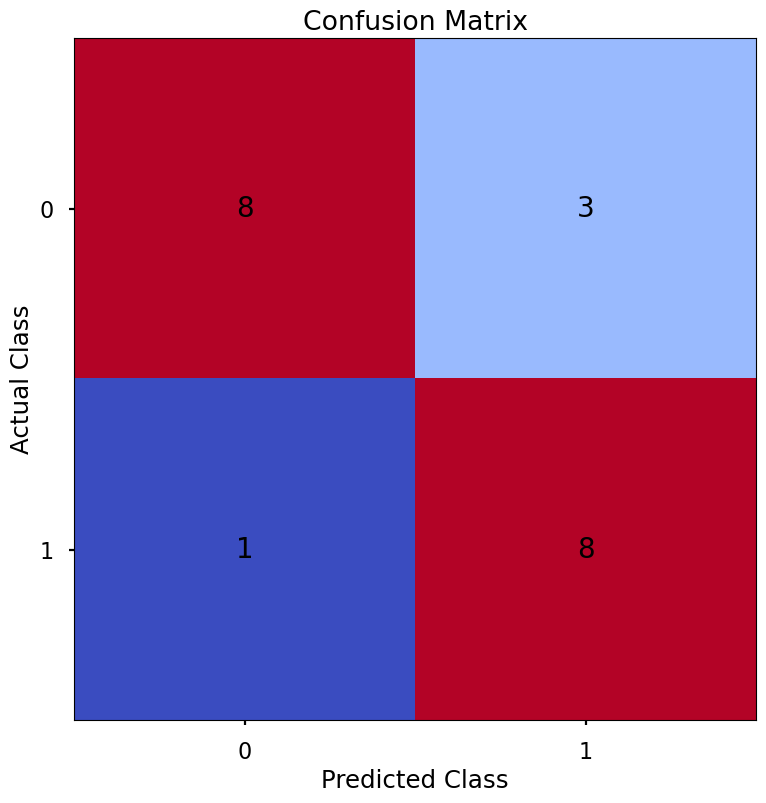

In [12]:
import numpy as np

plt.style.use("seaborn-poster")
plt.matshow(conf_matrix, cmap = "coolwarm")
plt.gca().xaxis.tick_bottom()
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
for (i, j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j,i,corr_value,ha ="center", va="center",fontsize=20)
plt.show()